# Trabajo Práctica Experimental Nº 4

## 1. Introducción a los Árboles de Decisión
Los árboles de decisión son modelos de aprendizaje supervisado utilizados para tareas de clasificación y regresión.
Funcionan dividiendo el espacio de características en subconjuntos según criterios como Gini o Entropía, que permiten
crear una estructura jerárquica para tomar decisiones.

## 2. Preparación del Entorno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Cargar el conjunto de datos
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## 3. División del Conjunto de Datos

In [7]:
# Definir características y variable objetivo
# Datos X: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
# Variable Objetivo: Outcome
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Construcción del Árbol de Decisión

In [9]:
# Modelo utilizando el criterio de entropía
model_diabetes = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Modelo utilizando el criterio de gini
model_diabetes_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

## 5. Entrenamiento del modelo

In [10]:
# Entrenar el modelo con el criterio de entropía
model_diabetes.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [11]:
# Entrenar el modelo con el criterio de gini
model_diabetes_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## 6. Evaluación del modelo

In [12]:
# Predicciones
y_pred = model_diabetes.predict(X_test)
print(y_pred)


[1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0]


In [13]:
y_pred_gini = model_diabetes_gini.predict(X_test)
print(y_pred_gini)

[1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0]


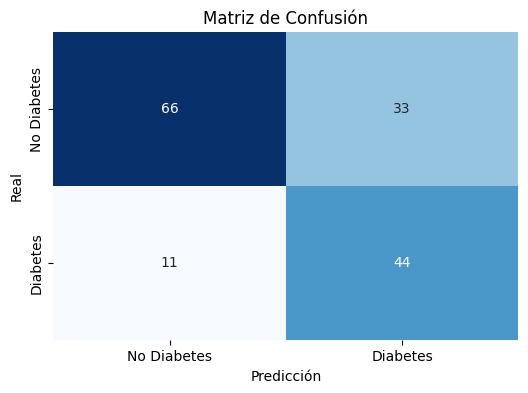

In [24]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

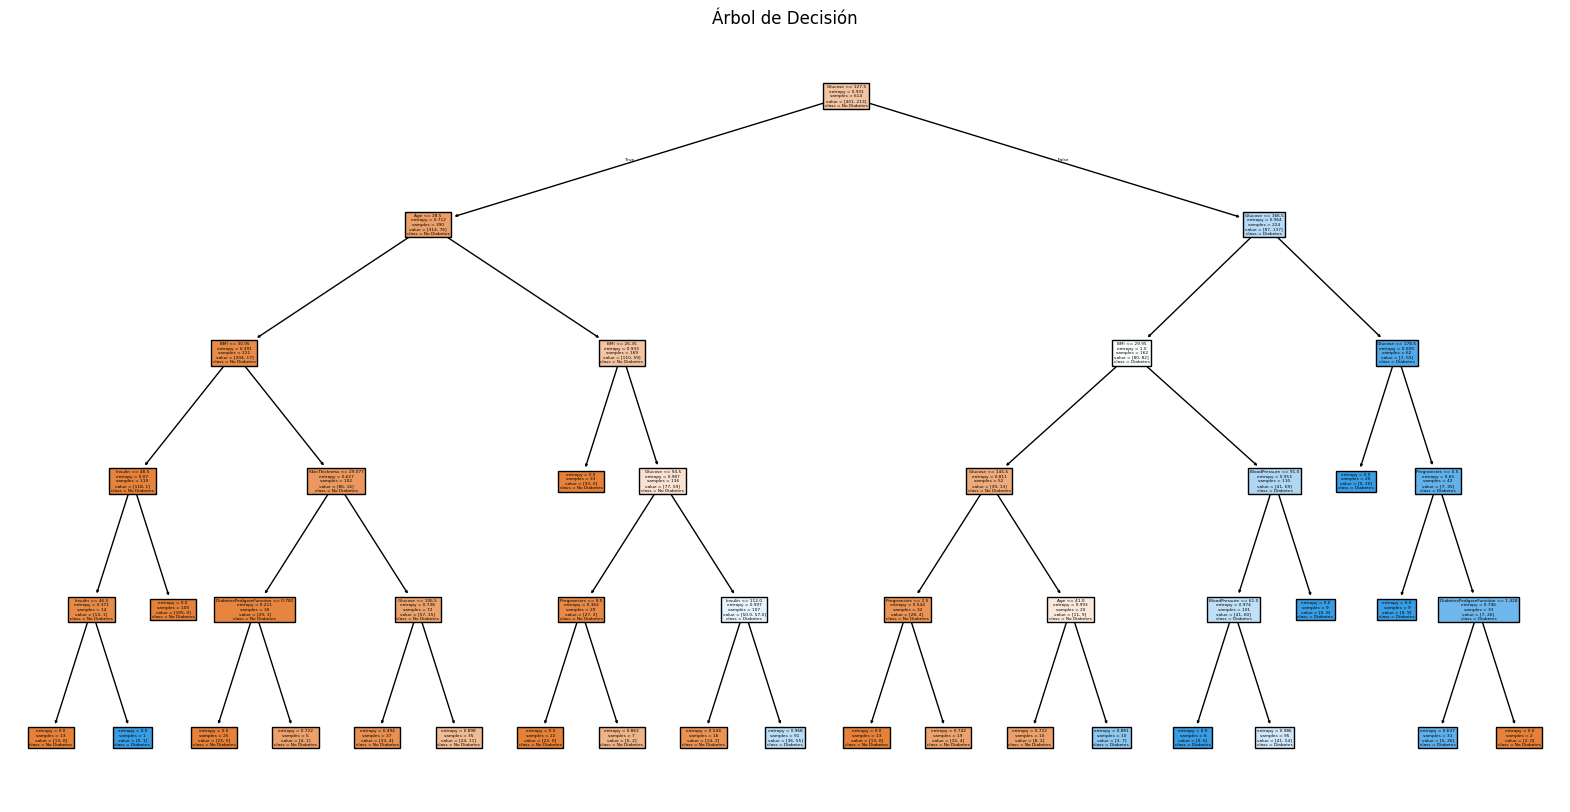

In [26]:
# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(model_diabetes, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Árbol de Decisión")
plt.show()

In [25]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
accuracy = model_diabetes.score(X_test, y_test) * 100
print("El modelo inicial es capaz de predecir correctamente un {:.2f}% de las observaciones del conjunto de test.".format(accuracy))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        99
           1       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154

El modelo inicial es capaz de predecir correctamente un 71.43% de las observaciones del conjunto de test.


## 7. Optimización del Árbol de Decisión:

In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(2, 15),
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predicciones con el mejor modelo
y_pred_best = grid_search.best_estimator_.predict(X_test)

print("Mejores parámetros:", grid_search.best_params_)
print("\nReporte de Clasificación con el Mejor Modelo:")
print(classification_report(y_test, y_pred_best))
print("=============================================")
print("Precisión en test con mejor modelo: {:.2f}%".format(grid_search.best_estimator_.score(X_test, y_test) * 100))
print("=============================================")


Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3}

Reporte de Clasificación con el Mejor Modelo:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Precisión en test con mejor modelo: 77.27%


## 8. Conclusiones y discusión:

En la práctica, se construyó un modelo de árbol de decisión para predecir la presencia de diabetes utilizando el dataset en formato CSV. Se entrenó el modelo con una profundidad máxima de 5 y con los criterios de separación de entropy y gini; se evaluó su desempeño utilizando métricas como precisión, recall y F1-score. Obteniendo como resultado un **71.43%** de precisión con el modelo inicial. El modelo logró resultados aceptables, destacando una buena capacidad para identificar casos positivos y negativos.

El mejor clasificador encontrado logró un rendimiento notable en el conjunto de prueba, obteniendo una precisión del **77.27%**, y presentando un balance adecuado entre sensibilidad y especificidad, como lo demuestra el reporte de clasificación generado. Esta optimización evidencia la importancia de ajustar adecuadamente los hiper-parámetros del modelo para mejorar la capacidad predictiva y generalización del árbol de decisión.


### Ventajas

- **Fácil interpretación**: permite visualizar el proceso de decisión.
- **Poca preparación de datos**: no requiere escalado o normalización.
- **Soporte para datos mixtos**: puede manejar variables numéricas y categóricas.

### Limitaciones

- **Riesgo de sobreajuste**: especialmente con árboles muy profundos.
- **Inestabilidad**: pequeños cambios en los datos pueden generar árboles distintos.
- **Menor precisión frente a modelos más complejos** como Random Forest o XGBoost.

---

### Aplicación en el Mundo Real

Los conceptos aprendidos pueden aplicarse en sistemas de apoyo a decisiones médicas, como el diagnóstico de enfermedades en función de síntomas y antecedentes. También son útiles en áreas como evaluación crediticia, predicción de abandono escolar o segmentación de clientes. 

El árbol de decisión destaca cuando se necesita un modelo comprensible para explicar decisiones automáticas en contextos sensibles como salud, educación o finanzas.
